In [31]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

# We will try the power of CNN for classification on MNIST data, then we will try it on wildlife images for the classification.
## Goal is to check the adaptability of CNN for basic data and complex data.

In [32]:
# Loading MNIST data

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


print(f"Training images shape: {train_images.shape}")
print(f"Testing images shape: {test_images.shape}")

Training images shape: (60000, 28, 28)
Testing images shape: (10000, 28, 28)


### Input images are in (28, 28, 1) format.

### Creating the CNN model with basix parameters

In [33]:
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential


input_shape = (28, 28, 1) 

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=50)

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(acc)+1)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9464 - loss: 0.3767 - val_accuracy: 0.9768 - val_loss: 0.0703
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9815 - loss: 0.0591 - val_accuracy: 0.9815 - val_loss: 0.0550
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9865 - loss: 0.0436 - val_accuracy: 0.9845 - val_loss: 0.0552
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9857 - val_loss: 0.0544
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.9846 - val_loss: 0.0542
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9910 - loss: 0.0300 - val_accuracy: 0.9866 - val_loss: 0.0480
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9924 - loss: 0.0265 - val_accuracy: 0.9826 - val_loss: 0.0592
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9929 -

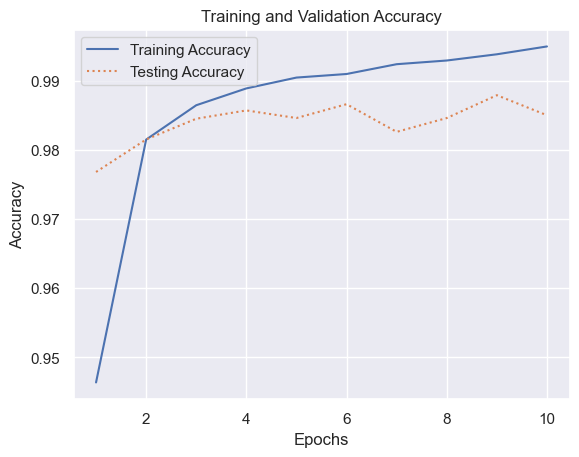

In [37]:
plt.plot(epochs, acc, '-', label="Training Accuracy")
plt.plot(epochs, val_acc, ':', label='Testing Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# The above model shows a little overfitting, we will check if we can reduce it by using GlobalMaxPooling2D

In [38]:
from tensorflow.keras.layers import GlobalMaxPooling2D

input_shape = (28, 28, 1) 

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(GlobalMaxPooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,426 (111.04 KB)

 Trainable params: 28,426 (111.04 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:

hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=50)

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(acc)+1)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8529 - loss: 0.7607 - val_accuracy: 0.9269 - val_loss: 0.2409
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9506 - loss: 0.1657 - val_accuracy: 0.9526 - val_loss: 0.1553
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9638 - loss: 0.1169 - val_accuracy: 0.9634 - val_loss: 0.1179
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9698 - loss: 0.0993 - val_accuracy: 0.9730 - val_loss: 0.0881
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9728 - loss: 0.0897 - val_accuracy: 0.9748 - val_loss: 0.0910
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9757 - loss: 0.0782 - val_accuracy: 0.9767 - val_loss: 0.0710
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9784 - loss: 0.0704 - val_accuracy: 0.9718 - val_loss: 0.1007
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9797 - loss: 0

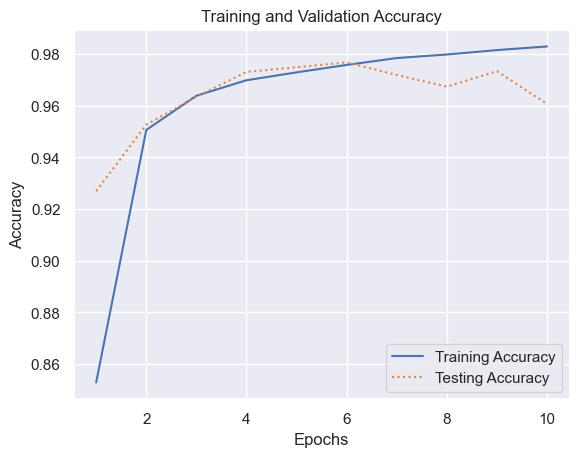

In [40]:
plt.plot(epochs, acc, '-', label="Training Accuracy")
plt.plot(epochs, val_acc, ':', label='Testing Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## The above plot shows perfect model performance.

# Now we will try to build CNN model to classify arctic wildife animals. 
## We have only 100 images per class. Data is not enough to get the best result.

In [41]:
#Function to load images.

def load_images_from_path(path, label):
    images, labels = [], []
    
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224,3))
        images.append(image.img_to_array(img))
        labels.append((label))
    return images, labels

In [42]:
#Function to display images.

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20),
subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x_train, y_train, x_test, y_test = [], [], [], []

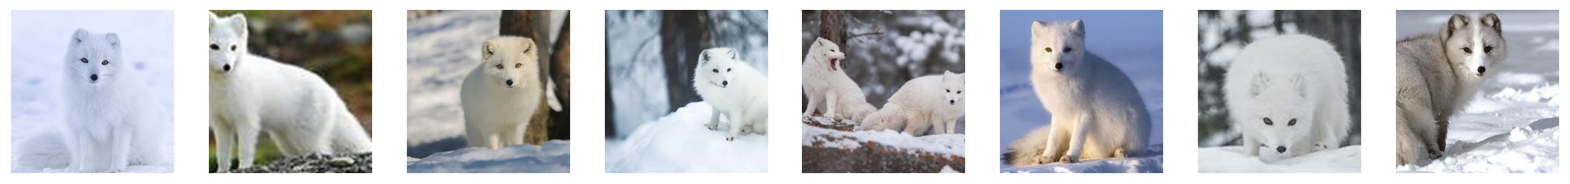

In [43]:
images, labels = load_images_from_path('Wildlife/train/arctic_fox', 0)
show_images(images)
x_train += images
y_train += labels

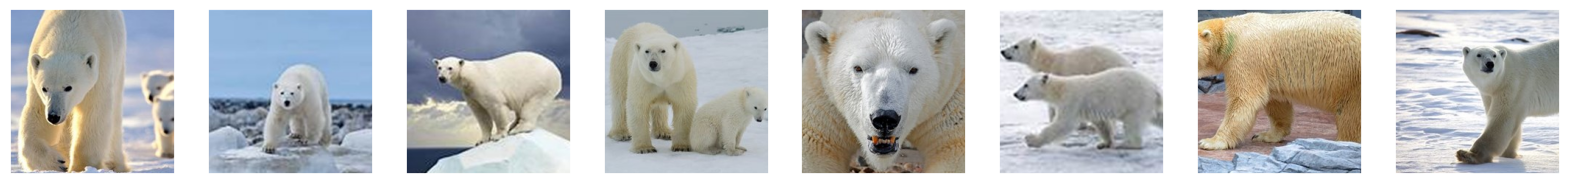

In [44]:
images, labels = load_images_from_path('Wildlife/train/polar_bear', 1)
show_images(images)
x_train += images
y_train += labels

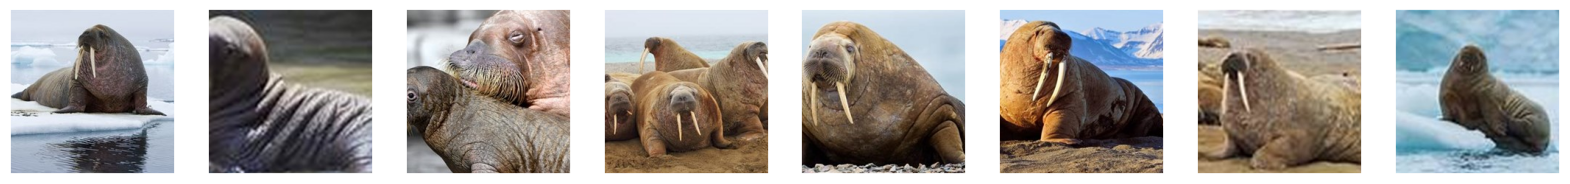

In [45]:
images, labels = load_images_from_path('Wildlife/train/walrus', 2)
show_images(images)
x_train += images
y_train += labels

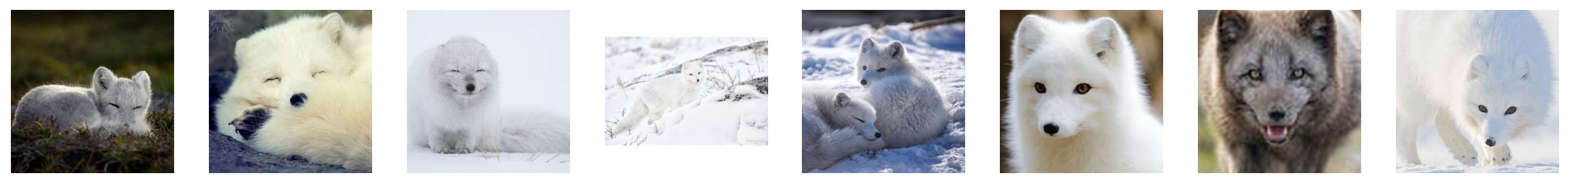

In [46]:
images, labels = load_images_from_path('Wildlife/test/arctic_fox', 0)
show_images(images)
x_test += images
y_test += labels

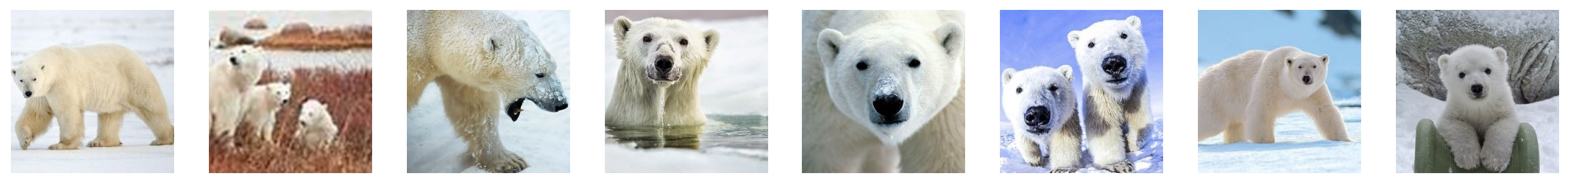

In [47]:
images, labels = load_images_from_path('Wildlife/test/polar_bear', 1)
show_images(images)
x_test += images
y_test += labels

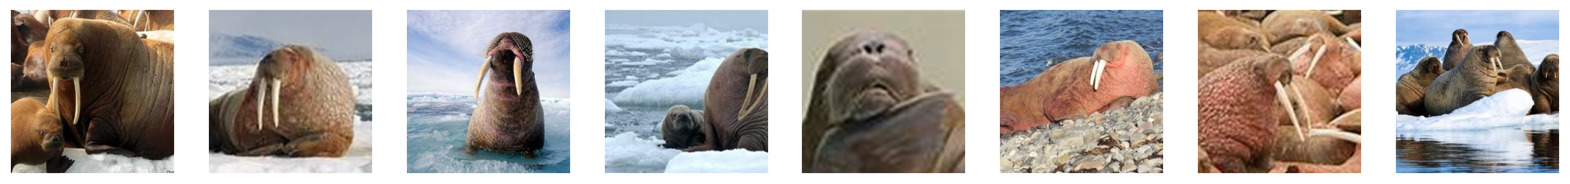

In [48]:
images, labels = load_images_from_path('Wildlife/test/walrus', 2)
show_images(images)
x_test += images
y_test += labels

In [49]:
import numpy as np

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
y_train = np.array(y_train)
y_test = np.array(y_test)

# Creating a CNN model with 5 pairs of Conv2D and MaxPooling2D layers. 
## Using 1 layer of 1024 neurons to create classifier layer.

In [50]:
 input_shape = x_train.shape[1:]

In [51]:
#Creating CNN model to classify above data

model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3,3), activation='relu', input_shape = input_shape))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Conv2D(128, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Conv2D(128, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))

model_cnn.add(Flatten())
model_cnn.add(Dense(1024, activation='relu'))
model_cnn.add(Dense(3, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       3,277,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,558,659 (13.58 MB)

 Trainable params: 3,558,659 (13.58 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
training = model_cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=10)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.4000 - loss: 1.0286 - val_accuracy: 0.6000 - val_loss: 0.8693
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.6133 - loss: 0.7893 - val_accuracy: 0.5000 - val_loss: 0.9250
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.6300 - loss: 0.8221 - val_accuracy: 0.6583 - val_loss: 0.7600
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - accuracy: 0.6733 - loss: 0.6960 - val_accuracy: 0.6667 - val_loss: 0.7151
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - accuracy: 0.6967 - loss: 0.6189 - val_accuracy: 0.6583 - val_loss: 0.8404
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.6667 - loss: 0.6963 - val_accuracy: 0.7250 - val_loss: 0.6924
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - accuracy: 0.6767 - loss: 0.6424 - val_accuracy: 0.7083 - val_loss: 0.6553
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.6967 - loss: 0.5766 - val_accuracy:

[]

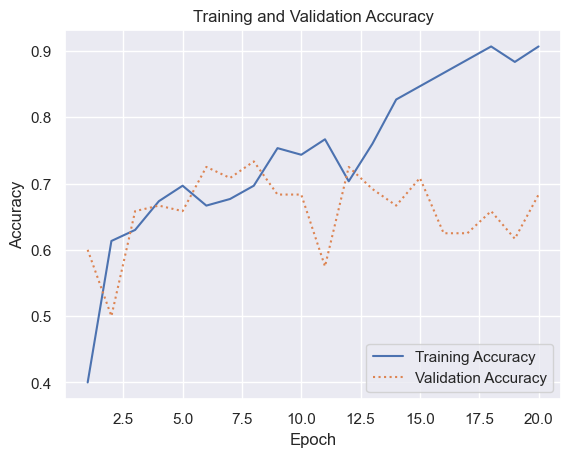

In [53]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Model has very low accuracy.
# Model has overfitting issue, will  use Dropout and GlobalMaxPooling2D to reduce it.

In [54]:
from tensorflow.keras.layers import Dropout, GlobalMaxPooling2D

In [55]:
from tensorflow.keras.layers import Dropout, GlobalMaxPooling2D

model_cnn2 = Sequential()

model_cnn2.add(Conv2D(32, (3,3), activation='relu', input_shape = input_shape))
model_cnn2.add(MaxPooling2D(2,2))

model_cnn2.add(Conv2D(64, (3,3), activation='relu'))
model_cnn2.add(MaxPooling2D(2,2))
model_cnn2.add(Dropout(0.2))
model_cnn2.add(Conv2D(64, (3,3), activation='relu'))
model_cnn2.add(MaxPooling2D(2,2))
model_cnn2.add(Dropout(0.2))
model_cnn2.add(Conv2D(128, (3,3), activation='relu'))
model_cnn2.add(MaxPooling2D(2,2))
model_cnn2.add(Dropout(0.2))
model_cnn2.add(Conv2D(128, (3,3), activation='relu'))
model_cnn2.add(MaxPooling2D(2,2))

model_cnn2.add(GlobalMaxPooling2D())
model_cnn2.add(Dense(1024, activation='relu'))
model_cnn2.add(Dense(3, activation='softmax'))
model_cnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │         132,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,931 (1.58 MB)

 Trainable params: 412,931 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
training_cnn2 = model_cnn2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=10)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.3267 - loss: 1.1027 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.3567 - loss: 1.1025 - val_accuracy: 0.5083 - val_loss: 1.0879
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.3367 - loss: 1.1063 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.2967 - loss: 1.0995 - val_accuracy: 0.3333 - val_loss: 1.0985
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 367ms/step - accuracy: 0.3700 - loss: 1.0955 - val_accuracy: 0.5083 - val_loss: 1.0827
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.4800 - loss: 1.0251 - val_accuracy: 0.5583 - val_loss: 1.0020
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.5067 - loss: 1.0094 - val_accuracy: 0.5250 - val_loss: 1.0083
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.5667 - loss: 0.9195 - val_accuracy:

[]

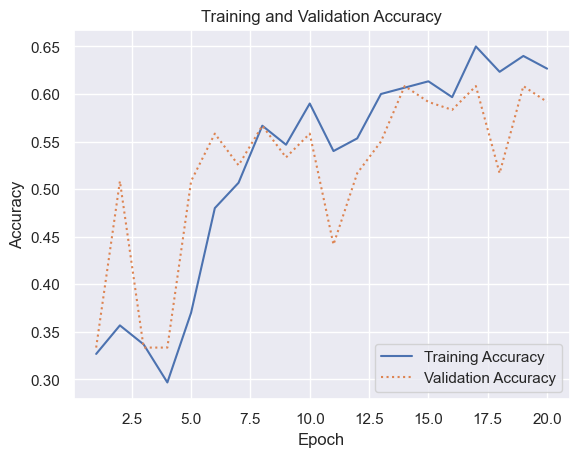

In [57]:
acc = training_cnn2.history['accuracy']
val_acc = training_cnn2.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Overfitting issue has been resolved but accuracy is still low.
## Will try Transfer Learning now.
## Using ResNet50V2 to use it as feature extractor.

### Loading image again to preprocess it for the ResNet50V2 model.

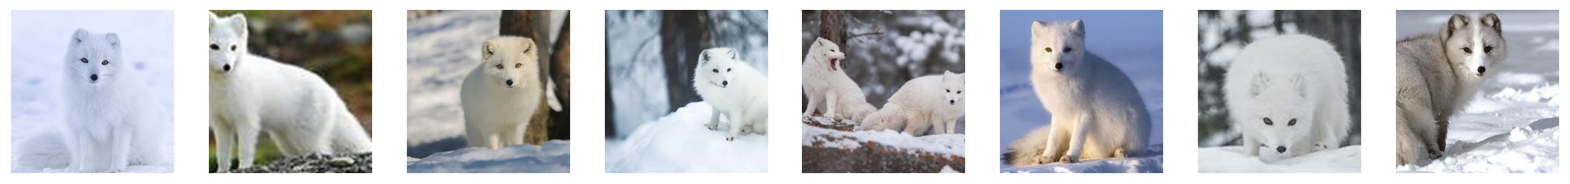

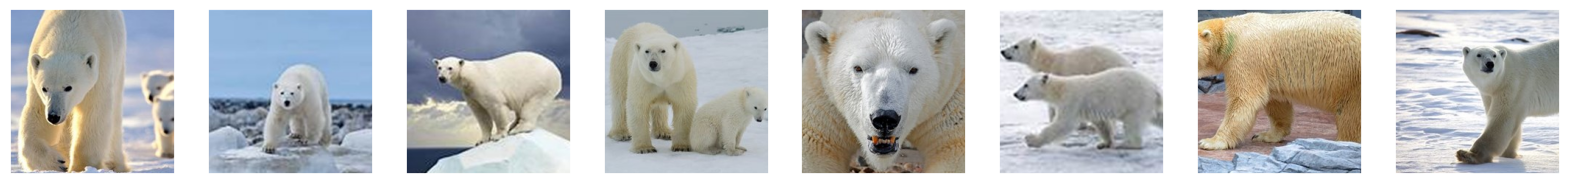

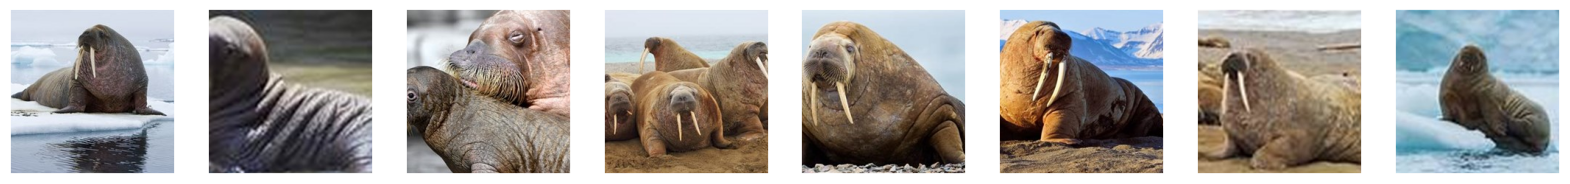

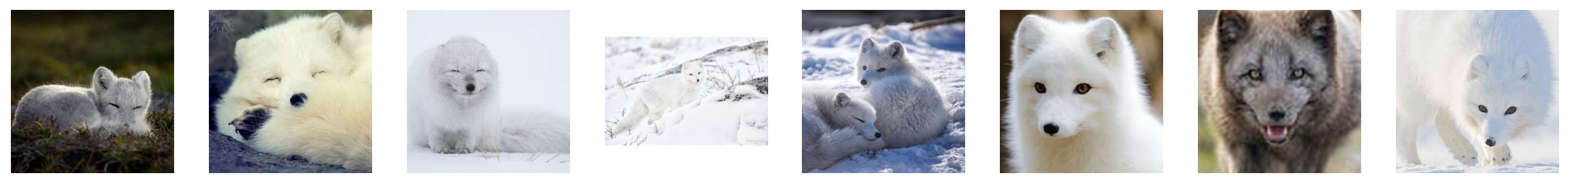

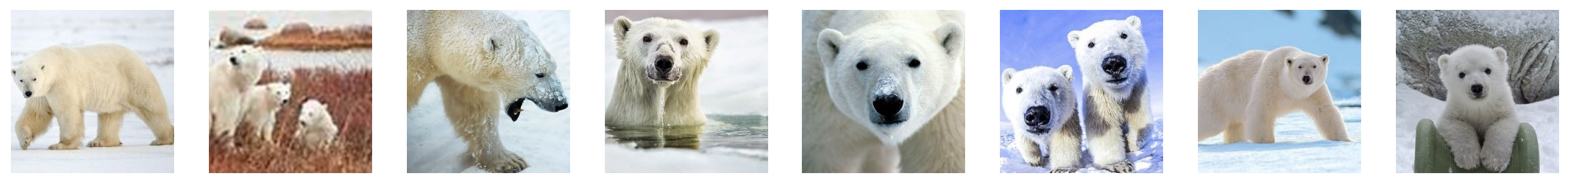

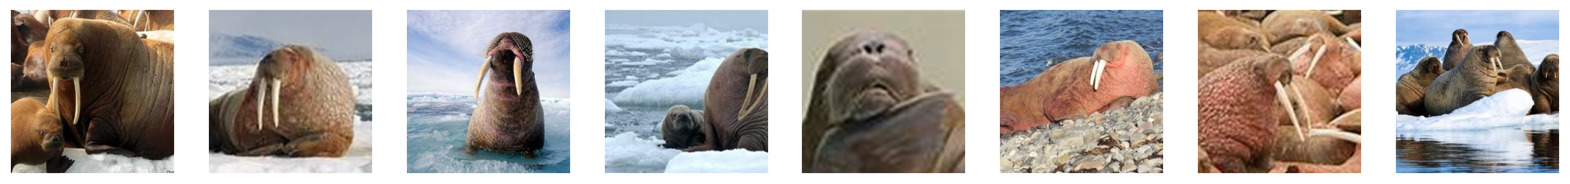

In [58]:
x_train1, x_test1, y_train1, y_test1 = [], [], [], []

images, labels = load_images_from_path('Wildlife/train/arctic_fox', 0)
show_images(images)
x_train1 += images
y_train1 += labels

images, labels = load_images_from_path('Wildlife/train/polar_bear', 1)
show_images(images)
x_train1 += images
y_train1 += labels

images, labels = load_images_from_path('Wildlife/train/walrus', 2)
show_images(images)
x_train1 += images
y_train1 += labels

images, labels = load_images_from_path('Wildlife/test/arctic_fox', 0)
show_images(images)
x_test1 += images
y_test1 += labels

images, labels = load_images_from_path('Wildlife/test/polar_bear', 1)
show_images(images)
x_test1 += images
y_test1 += labels

images, labels = load_images_from_path('Wildlife/test/walrus', 2)
show_images(images)
x_test1 += images
y_test1 += labels

In [59]:
import numpy as np

In [60]:
from tensorflow.keras.applications.resnet50 import preprocess_input
x_train = preprocess_input(np.array(x_train1)) / 255
x_test = preprocess_input(np.array(x_test1)) / 255
y_train = np.array(y_train1)
y_test = np.array(y_test1)

In [61]:
base_model = ResNet50V2(weights='imagenet', include_top=False)
x_train = base_model.predict(x_train)
x_test = base_model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [62]:
model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
hist = model.fit(x_train, y_train,
validation_data=(x_test, y_test),
batch_size=10, epochs=10)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8867 - loss: 10.4776 - val_accuracy: 0.9500 - val_loss: 8.8538
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9800 - loss: 3.8885 - val_accuracy: 0.9583 - val_loss: 13.8349
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9933 - loss: 0.5800 - val_accuracy: 0.9417 - val_loss: 9.3743
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9967 - loss: 0.1494 - val_accuracy: 0.9500 - val_loss: 12.5096
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9933 - loss: 1.9114 - val_accuracy: 0.9750 - val_loss: 4.9279
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9933 - loss: 0.1858 - val_accuracy: 0.9583 - val_loss: 12.8442
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9967 - loss: 1.0733 - val_accuracy: 0.9750 - val_loss: 3.0594
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9967 - loss: 0.0725 - val_accuracy: 0.9667 - val_l

[]

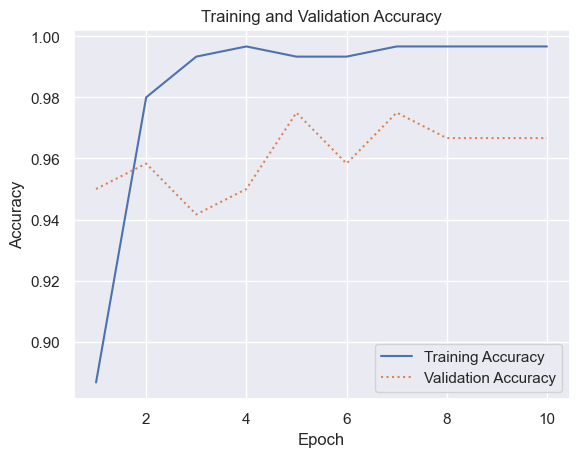

In [63]:
sns.set()
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


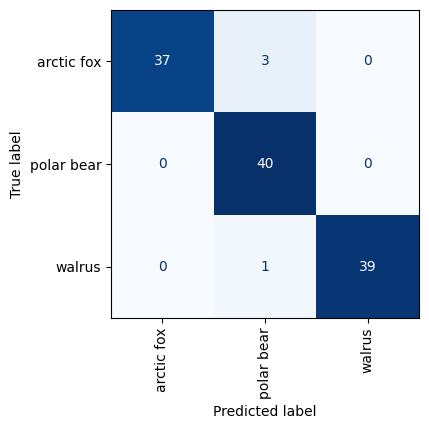

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
sns.reset_orig()
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid(False)
y_pred = model.predict(x_test)
class_labels = ['arctic fox', 'polar bear', 'walrus']

cmd.from_predictions(y_test, y_pred.argmax(axis=1),
display_labels=class_labels, colorbar=False,
cmap='Blues', xticks_rotation='vertical', ax=ax)

# The above plot shows perfect model accuracy.

## We will check the accuracy on the unseen data.

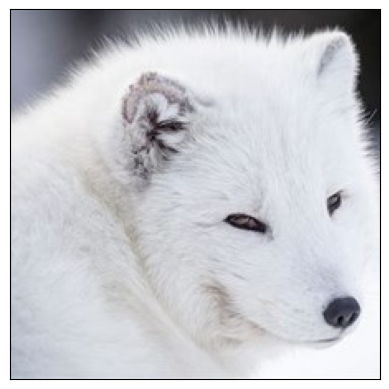

In [65]:
x = image.load_img('Wildlife/samples/arctic_fox/arctic_fox_140.jpeg',
target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [66]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255
y = base_model.predict(x)
predictions = model.predict(y)
for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
arctic fox: 1.0
polar bear: 0.0
walrus: 0.0
